In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "sugar"

CATEGORIES = ["nosack","sack_only"]
# CATEGORIES =["sack2"]
#CATEGORIES = ["nosackwm","sackwm","sack"]
training_data = []
classes=[]
IMG_SIZE=200
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                #new_array=img_array
                training_data.append(new_array)  # add this to our training_data
                classes.append(class_num)
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))


In [3]:
create_training_data()

100%|██████████| 500/500 [00:05<00:00, 93.22it/s] 


In [4]:
from sklearn.model_selection import train_test_split
l=len(training_data)
#print(len(training_data))
#print(len(classes))
y=np.array(classes)
#y.shape
data= np.zeros((l,200,200), dtype=np.float32)
for i in range(l):
    data[i] = training_data[i]
X_train, X_test, y_train, y_test = train_test_split(data,y, test_size=0.1)

In [6]:
ltr=len(X_train)
lte=len(X_test)

xtr=X_train.reshape(ltr,40000)
xte=X_test.reshape(lte,40000)

In [8]:
from sklearn.decomposition import PCA

In [11]:
# Compute a PCA 
n_components = 2
pca = PCA(n_components=n_components, whiten=True).fit(xtr)
 
# apply PCA transformation
X_train_pca = pca.transform(xtr)
X_test_pca = pca.transform(xte)

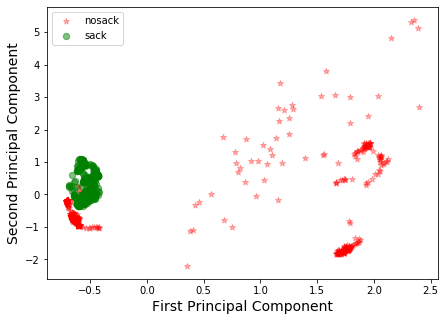

In [14]:
# visualizing pca's
x1=X_train_pca[:, 0]
x2=X_train_pca[:, 1]
labels=y_train

cdict={0:'red',1:'green'}
labl={0:'nosack',1:'sack'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}

fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')

for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(x1[ix],x2[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [15]:
from sklearn.svm import SVC

In [16]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred = svclassifier.predict(X_test_pca)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43  7]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        50
           1       0.88      1.00      0.93        50

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.94      0.93      0.93       100

